# Keras: CV using deep NN

**Content**: 
- Multi classification by 3 layers classic NN for MNIST handwritten digit dataset

**Note**: This is to run on colab 


## 1. The Network

Raw values of every pixel are used as reatures to input to the network. 
<br>The images are matrices of size 28×28. 
<br> So, this requires to reshape the image matrix to an array of size 784 ( 28*28 ) and feed this array to the network. 
<br> It uses the network with 2 hidden layers having 512 neurons each
<br>The output layer has 10 layers for the 10 digits. A schematic diagram is shown below.

<img src="image_for_learing_keras_1.jpg" align = 'left' style="width:400;height:400px;"> 


In [2]:
!wget https://www.dropbox.com/s/6w39pme4spqbj9e/mlp-mnist-schematic.jpeg?dl=0 -O /content/sample_data/mlp-mnist-schematic.jpeg



--2021-10-17 17:09:17--  https://www.dropbox.com/s/6w39pme4spqbj9e/mlp-mnist-schematic.jpeg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/6w39pme4spqbj9e/mlp-mnist-schematic.jpeg [following]
--2021-10-17 17:09:18--  https://www.dropbox.com/s/raw/6w39pme4spqbj9e/mlp-mnist-schematic.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce42cd71e7c242e59bc3168138d.dl.dropboxusercontent.com/cd/0/inline/BYNjqP61t71vhKF9woLCFV9z6krRnerjgQT0EYS-XbKdwWZv6aISHcjWokwo-f2GpFsMJjRe4Ay9kdWJsMBfbBvt5GuX1FB1ZbxF9lqwgnJr8716SQ-uhQMhBaH3UEMWR7RKgaWeB_lAqNSifqi4dLJU/file# [following]
--2021-10-17 17:09:18--  https://uce42cd71e7c242e59bc3168138d.dl.dropboxusercontent.com/cd/0/inline/BYNjqP61t71vhKF9woLCFV9z6krRnerjgQT0EYS-XbKdwWZv6

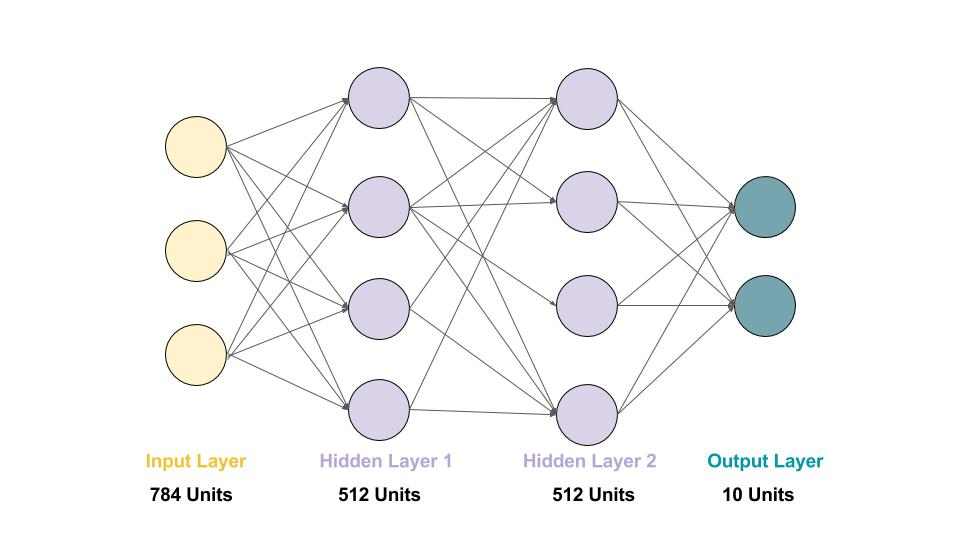

In [3]:
from IPython.display import Image
Image('/content/sample_data/mlp-mnist-schematic.jpeg')

## 2. Load the Data

MNIST is a commonly used handwritten digit dataset consisting of 60,000 images in the training set and 10,000 images in the test set. 

So, each of 10 digit has 6000 images in the training set. 

The digits are size-normalized and centered in a fixed-size ( 28×28 ) image.

Keras comes with the MNIST data loader. 

It has a function `mnist.load_data()` which downloads the data from its servers if it is not present on your computer. 

The data loaded using this function is divided into training and test sets. This is done by the following :


In [98]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test)  = mnist.load_data()

### Review the data 



In [99]:
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
# %matplotlib inline 

In [100]:
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None:
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows):
        for j in range (n_cols):
            index = n_cols*i+j
            ax = plt.subplot(n_rows,n_cols,index+1)
            ax.imshow(X[indices[index]], cmap='Greys')
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')


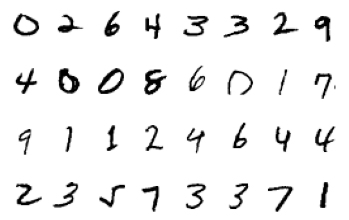

In [101]:
plt.figure()

X_grid= X_train.reshape([-1, 28, 28])
display_samples_in_grid(X_grid, n_rows=4, n_cols=8)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 7')

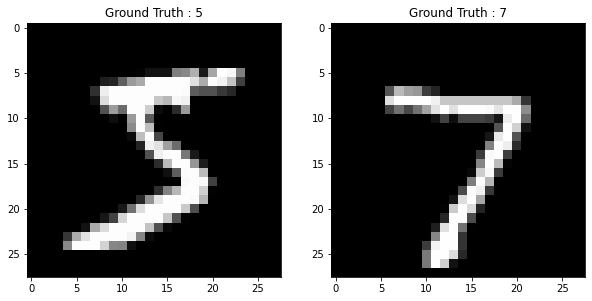

In [102]:
print('Training data shape : ', X_train.shape, Y_train.shape)
print('Testing data shape : ', X_test.shape, Y_test.shape)
 
# Find the unique numbers from the train labels
classes = np.unique(Y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_train[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_test[0]))

## 4. Process the data

1. Convert each image matrix ( 28×28 ) to an array ( 28*28 = 784 dimenstional ) which will be fed to the network as a single feature.

In [103]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(X_train.shape[1:])
X_train = X_train.reshape(X_train.shape[0], dimData) # think could be just -1 
X_test = X_test.reshape(X_test.shape[0], dimData)

In [104]:
print('Training data shape : ', X_train.shape, Y_train.shape)
print('Testing data shape : ', X_test.shape, Y_test.shape)

Training data shape :  (60000, 784) (60000,)
Testing data shape :  (10000, 784) (10000,)


2. Convert the data to float and scale the values between 0 to 1.

Note sure why it is important to convert first. Even though originally it is numpy.uint8 (just check `type(train_data[0][0])`) 

In [10]:
# Change to float datatype
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
 
# Scale the data to lie between 0 to 1
X_train /= 255
X_test /= 255

3. Convert the **labels** from integer to categorical ( one-hot ) encoding since that is the format **required by Keras** to perform multiclass classification. 

One-hot encoding is a type of boolean representation of integer data. It converts the integer to an array of all zeros except a 1 at the index of the integer.
For example, using a one-hot encoding for 10 classes, the integer 5 will be encoded as 0000010000

In [11]:
from tensorflow.keras.utils import to_categorical
# Change the labels from integer to categorical data
Y_train_one_hot = to_categorical(Y_train)
Y_test_one_hot = to_categorical(Y_test)
 
# Display the change for category label using one-hot encoding
print('Original label [0] : ', Y_train[0])
print('After conversion to categorical ( one-hot ) : ', Y_train_one_hot[0])

Original label [0] :  5
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 5.1. Create the model 

- The input to the network is the 784-dimensional array converted from the 28×28 image
- 2 hidden layers 
- The number of units in the hidden layers are 512. 
- Output layer has 10 units. 
- sequential model is used for building the network. 
- It contains `Dense` layer, (also called fully connected layer since all the neurons from one layer are connected to the neurons in the previous layer). 
- Apart from the `Dense` layer, the ReLU activation function is added, which is required to introduce **non-linearity** to the model. 
- The last layer is a `softmax` layer as it is a multiclass classification problem. (For binary classification, we can use sigmoid instead)


In [12]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

## 5.2. Configure the model 

- Optimizer is `rmsprop`. 
- Loss type is `categorical cross entropy` which is used for multiclass classification. 
- Metrics is `accuracy`

In [13]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## 5.3. Train the model
- Specify the **number of epochs as 20** (the whole dataset will be fed to the network 20 times)
- Use **test data** for validation

In [14]:
history = model.fit(X_train, Y_train_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(X_test, Y_test_one_hot))

Epoch 1/20
235/235 [==============================] - 5s 7ms/step - loss: 0.2759 - accuracy: 0.9140 - val_loss: 0.1236 - val_accuracy: 0.9634
Epoch 2/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0941 - accuracy: 0.9711 - val_loss: 0.0792 - val_accuracy: 0.9749
Epoch 3/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0591 - accuracy: 0.9814 - val_loss: 0.1015 - val_accuracy: 0.9689
Epoch 4/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0409 - accuracy: 0.9869 - val_loss: 0.0782 - val_accuracy: 0.9769
Epoch 5/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0293 - accuracy: 0.9906 - val_loss: 0.0879 - val_accuracy: 0.9753
Epoch 6/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0227 - accuracy: 0.9925 - val_loss: 0.0774 - val_accuracy: 0.9801
Epoch 7/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0173 - accuracy: 0.9941 - val_loss: 0.1396 - val_accuracy: 0.9701
Epoch 

## 5.4. Evaluate the trained model


In [ ]:
[test_loss, test_acc] = model.evaluate(X_test, Y_test_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.0841 - accuracy: 0.9733
Evaluation result on Test Data : Loss = 0.08409629762172699, accuracy = 0.9732999801635742


## 6. Check for Overfitting

The `fit()` function returns a history object which has a **dictionary of all the metrics** which are required to track during training.

Use the data in the history object to plot the loss and accuracy curves to check how the training process went.

Use the `history.history.keys()` function to check what metrics are present in the history. It should look like the following

`[‘acc’, ‘loss’, ‘val_acc’, ‘val_loss’]`




In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Accuracy Curves')

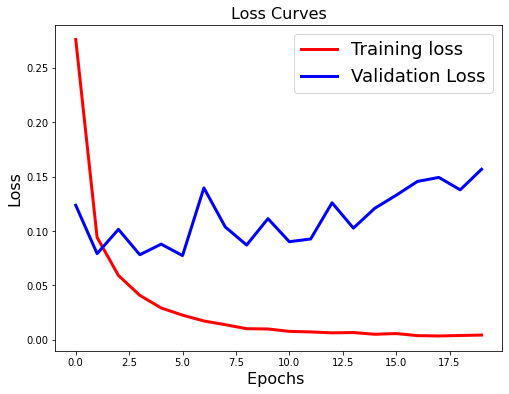

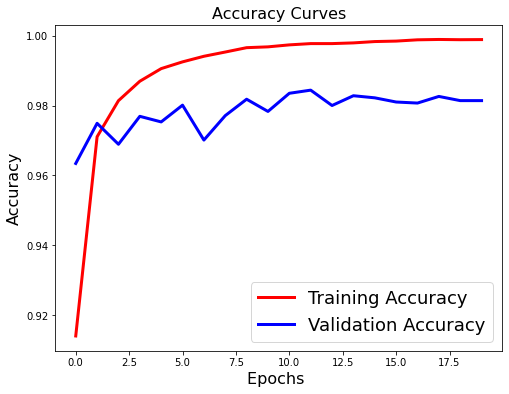

In [16]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Although the accuracy obtained above is very good, it may be worse in other cases, e.g. like on the image below


--2021-10-17 17:10:16--  https://www.dropbox.com/s/383h2801culc8al/overfit.png?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/383h2801culc8al/overfit.png [following]
--2021-10-17 17:10:16--  https://www.dropbox.com/s/raw/383h2801culc8al/overfit.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8979e565649e3a2b496fe9b9cd.dl.dropboxusercontent.com/cd/0/inline/BYN842mav_wcQmHprSavGzcOM7psaMiwLykAM9ROFZXG5fhyxCFYCCJ_yw5QpHCEZPQnWWcpbueA3sqPk38TqT76fDquKakBG76U3Zc3sDZsDFMcsrID2ZxTuQZOQzh0U36uXKaUIyqc8CUTGiPDGV-k/file# [following]
--2021-10-17 17:10:16--  https://uc8979e565649e3a2b496fe9b9cd.dl.dropboxusercontent.com/cd/0/inline/BYN842mav_wcQmHprSavGzcOM7psaMiwLykAM9ROFZXG5fhyxCFYCCJ_yw5QpHCEZPQnWWcpbueA3sqPk38TqT76

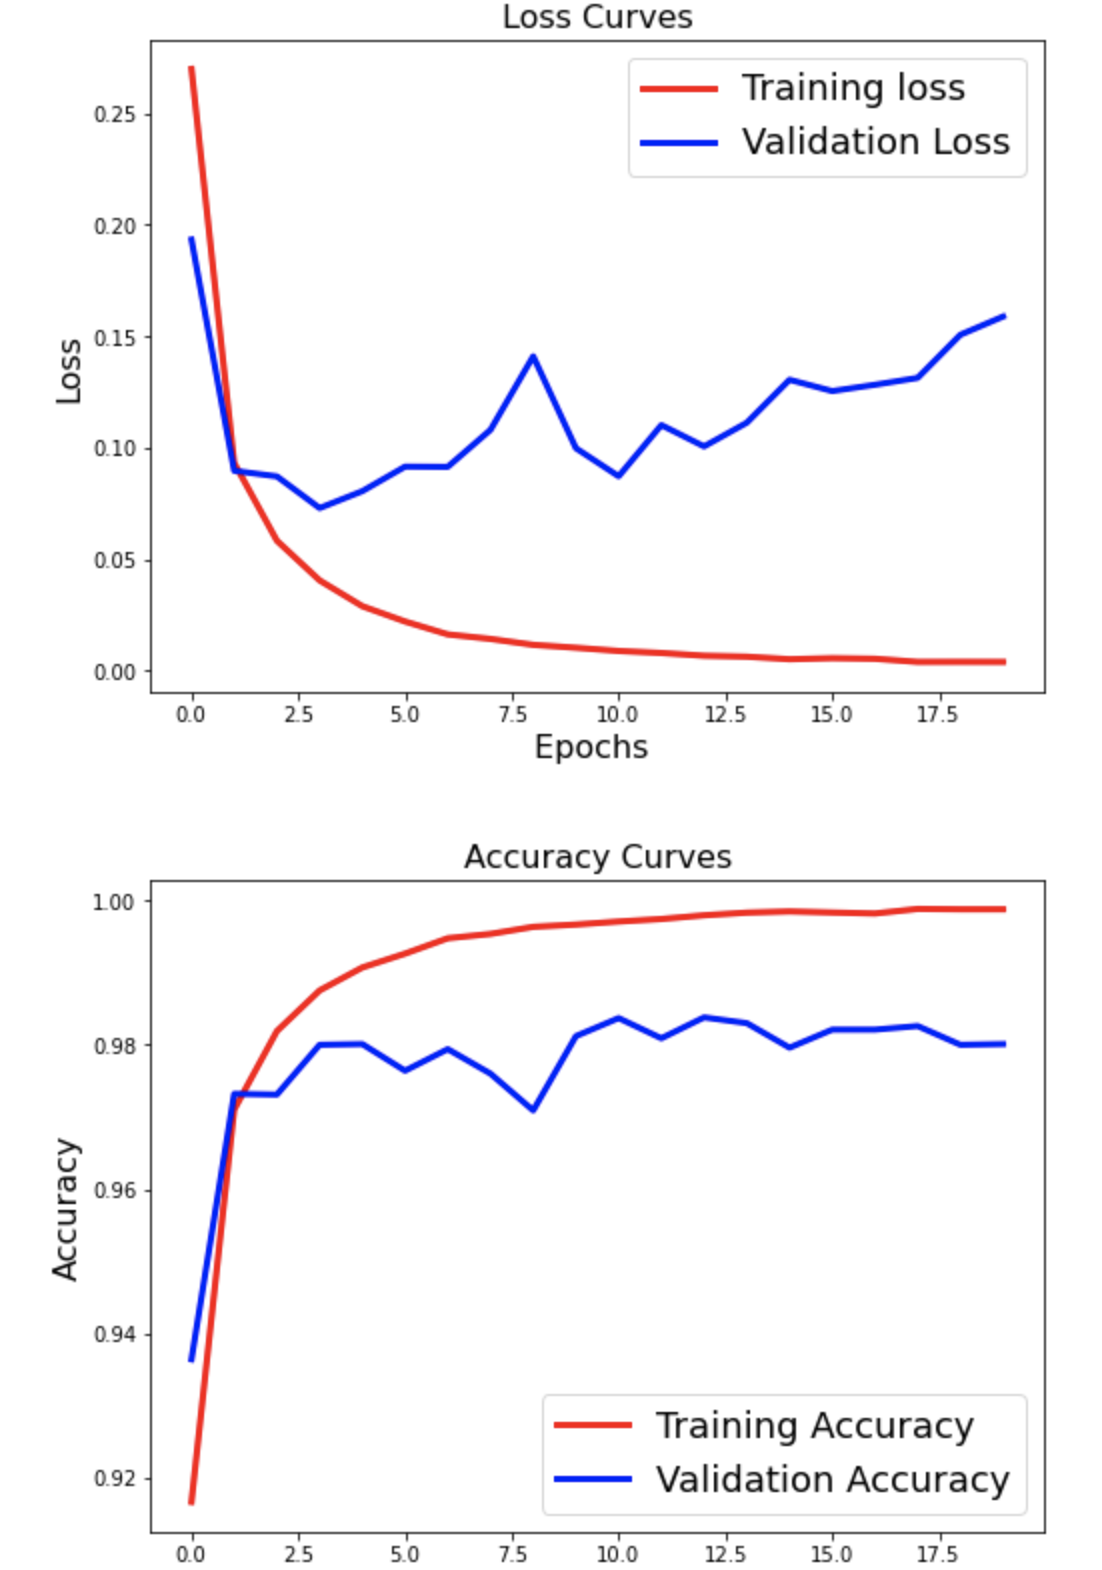

In [17]:
!wget https://www.dropbox.com/s/383h2801culc8al/overfit.png?dl=0 -O /content/sample_data/overfit.png
from IPython.display import Image
Image('/content/sample_data/overfit.png', width = 500, height = 800)



In this case the validation loss initially decrease, but then it starts **increasing gradually**. 

Also, there is a substantial difference between the training and test accuracy. 

This is a clear sign of **Overfitting** which means that the network has memorized the training data very well, but is not guaranteed to work on unseen data. 

## 7. Add Regularization to the model

Overfitting occurs mainly because the network parameters are getting too biased towards the training data. 

Add a `dropout layer` to overcome this problem to a certain extent. 

In case of dropout, a fraction of neurons is randomly turned off during the training process, reducing the dependency on the training set by some amount.

In [18]:
from keras.layers import Dropout
 
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))

## 8. Check performance after regularization
Train the network again in the same way and check the loss and accuracy curves.

Epoch 1/20
235/235 [==============================] - 2s 7ms/step - loss: 0.3712 - accuracy: 0.8850 - val_loss: 0.1912 - val_accuracy: 0.9404
Epoch 2/20
235/235 [==============================] - 2s 6ms/step - loss: 0.1689 - accuracy: 0.9496 - val_loss: 0.1022 - val_accuracy: 0.9691
Epoch 3/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1286 - accuracy: 0.9617 - val_loss: 0.0948 - val_accuracy: 0.9704
Epoch 4/20
235/235 [==============================] - 2s 6ms/step - loss: 0.1105 - accuracy: 0.9670 - val_loss: 0.0819 - val_accuracy: 0.9758
Epoch 5/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0982 - accuracy: 0.9706 - val_loss: 0.0748 - val_accuracy: 0.9788
Epoch 6/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0861 - accuracy: 0.9740 - val_loss: 0.0765 - val_accuracy: 0.9797
Epoch 7/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0813 - accuracy: 0.9754 - val_loss: 0.0752 - val_accuracy: 0.9804
Epoch 

Text(0.5, 1.0, 'Accuracy Curves')

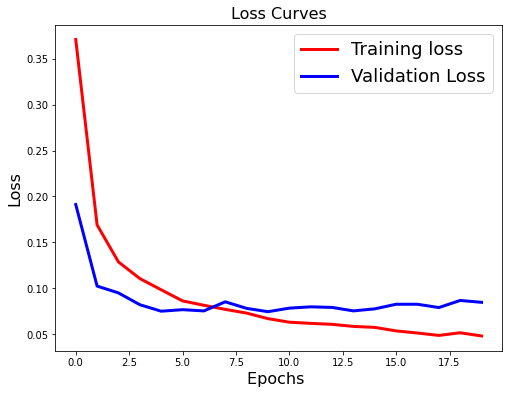

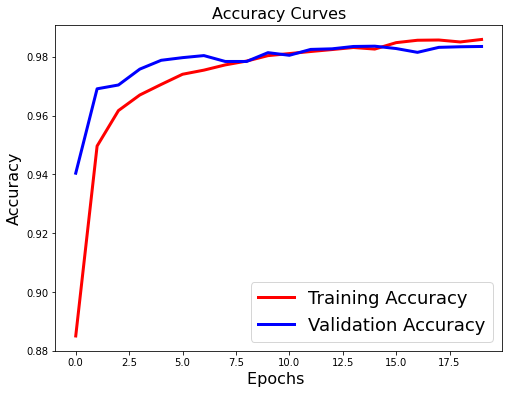

In [19]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_reg = model_reg.fit(X_train, Y_train_one_hot, batch_size=256, epochs=20, verbose=1, 
                            validation_data=(X_test, Y_test_one_hot))
 
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['accuracy'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

From the above loss and accuracy curves, we can observe that
- The validation loss is not increasing
- The difference between the train and validation accuracy is not very high

Thus, we can say that the model has better generalization capability as the performance does not decrease drastically in case of unseen data also.

In [20]:
[test_loss, test_acc] = model_reg.evaluate(X_test, Y_test_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))


313/313 [==============================] - 1s 3ms/step - loss: 0.0845 - accuracy: 0.9835
Evaluation result on Test Data : Loss = 0.08452104777097702, accuracy = 0.9835000038146973


## Inference

In [21]:
predict_x=model_reg.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
classes_x

array([7, 2, 1, ..., 4, 5, 6])

In [22]:
# Predict single image 
i=0
predict_x=model_reg.predict(X_test[i,:].reshape(1, -1)) 
classes_x=np.argmax(predict_x,axis=1)

In [23]:
classes_x

array([7])

## 10. Hometask 

1) Classify the signs (fingers)  dataset 

2) Try to change the number of hidden layer 

3) Change the activation to tanh or sigmoid and see what happens

4) Change the dropout ratio and check the performance

In [24]:
!wget https://www.dropbox.com/s/f33ym46utiwdvy4/train_signs.h5?dl=0 -O /content/sample_data/train_signs.h5
!wget https://www.dropbox.com/s/1doojr76evzroet/test_signs.h5?dl=0 -O /content/sample_data/test_signs.h5


--2021-10-17 17:10:55--  https://www.dropbox.com/s/f33ym46utiwdvy4/train_signs.h5?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/f33ym46utiwdvy4/train_signs.h5 [following]
--2021-10-17 17:10:55--  https://www.dropbox.com/s/raw/f33ym46utiwdvy4/train_signs.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1a59e209b38f7207dedeab3c1e.dl.dropboxusercontent.com/cd/0/inline/BYNZvYiQEHirEt8ygkOzQ--XGmFJDri3hjMBq4efwSoYBte2dV_lYiKTU2ErZMY5VYKRXSnw1bxg8mmm3Kktovt5oofLWvk3LGxAwyRLllbwr7PsjWy1uCIfF66V_-e9ToFCozhtGjsoC5WItHywM9jz/file# [following]
--2021-10-17 17:10:56--  https://uc1a59e209b38f7207dedeab3c1e.dl.dropboxusercontent.com/cd/0/inline/BYNZvYiQEHirEt8ygkOzQ--XGmFJDri3hjMBq4efwSoYBte2dV_lYiKTU2ErZMY5VYKRXSnw1bxg8mm

In [105]:

import h5py
def load_dataset():
    fn =   '/content/sample_data/train_signs.h5'
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    Y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    fn ='/content/sample_data/test_signs.h5'
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    Y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    # Y_train = Y_train.reshape((1, Y_train.shape[0]))
    # Y_test = Y_test.reshape((1, Y_test.shape[0]))
    
    return X_train, Y_train, X_test, Y_test, classes

X_train, Y_train, X_test, Y_test, classes = load_dataset()
nClasses = len(classes)

print ('X_train.shape=', X_train.shape)
print ('Y_train.shape=',  Y_train.shape)
print ('X_test.shape=', X_test.shape)
print ('Y_test.shape=', Y_test.shape)

X_train.shape= (1080, 64, 64, 3)
Y_train.shape= (1080,)
X_test.shape= (120, 64, 64, 3)
Y_test.shape= (120,)


In [106]:
# Change to float datatype
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
 
# Scale the data to lie between 0 to 1
X_train /= 255
X_test /= 255

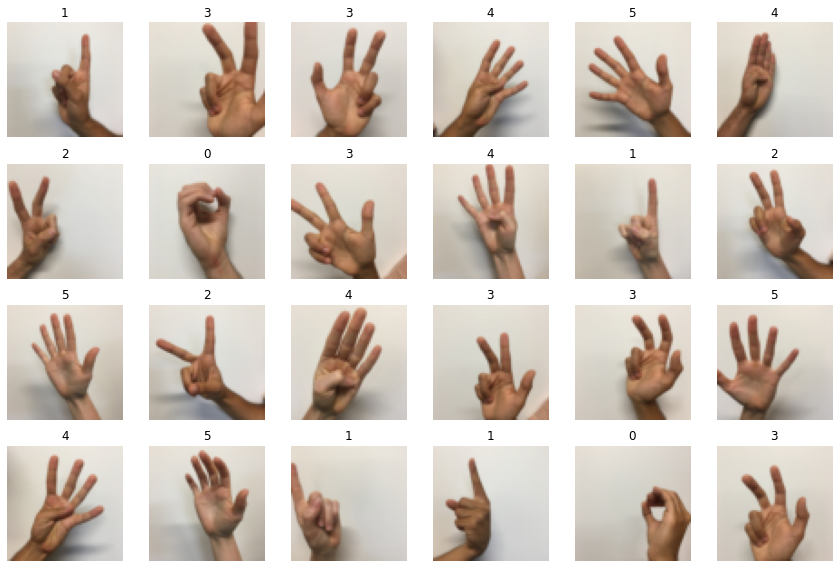

In [107]:
plt.figure(figsize= (12,8))
display_samples_in_grid(X_train, n_rows=4, n_cols=6, y= Y_train.T)
plt.tight_layout(h_pad=1, w_pad=1)

In [108]:
dimData = np.prod(X_train.shape[1:])
X_train = X_train.reshape(X_train.shape[0], dimData) # think could be just -1 
X_test = X_test.reshape(X_test.shape[0], dimData)

In [109]:
print ('X_train.shape=', X_train.shape)
print ('Y_train.shape=',  Y_train.shape)
print ('X_test.shape=', X_test.shape)
print ('Y_test.shape=', Y_test.shape)

X_train.shape= (1080, 12288)
Y_train.shape= (1080,)
X_test.shape= (120, 12288)
Y_test.shape= (120,)


In [110]:
from tensorflow.keras.utils import to_categorical

In [114]:
Y_train_one_hot = to_categorical(Y_train)
Y_test_one_hot = to_categorical(Y_test)

print('Original label [0] : ', Y_train[0])
print('After conversion to categorical ( one-hot ) : ', Y_train_one_hot[0])

Original label [0] :  5
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 1.]


In [130]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(nClasses, activation='softmax'))

In [127]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

Epoch 1/120
9/9 [==============================] - 1s 36ms/step - loss: 12.2600 - accuracy: 0.1574 - val_loss: 5.1949 - val_accuracy: 0.1667
Epoch 2/120
9/9 [==============================] - 0s 15ms/step - loss: 4.0506 - accuracy: 0.1731 - val_loss: 2.3026 - val_accuracy: 0.1667
Epoch 3/120
9/9 [==============================] - 0s 15ms/step - loss: 2.1773 - accuracy: 0.1815 - val_loss: 1.7218 - val_accuracy: 0.2917
Epoch 4/120
9/9 [==============================] - 0s 14ms/step - loss: 1.8093 - accuracy: 0.2111 - val_loss: 1.7231 - val_accuracy: 0.3250
Epoch 5/120
9/9 [==============================] - 0s 16ms/step - loss: 1.7443 - accuracy: 0.2528 - val_loss: 1.6906 - val_accuracy: 0.2917
Epoch 6/120
9/9 [==============================] - 0s 15ms/step - loss: 1.7062 - accuracy: 0.2907 - val_loss: 1.6549 - val_accuracy: 0.3333
Epoch 7/120
9/9 [==============================] - 0s 15ms/step - loss: 1.6695 - accuracy: 0.3083 - val_loss: 1.6058 - val_accuracy: 0.4000
Epoch 8/120
9/9 [==

Text(0.5, 1.0, 'Accuracy Curves')

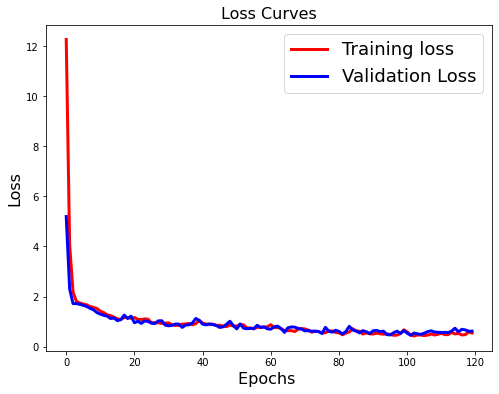

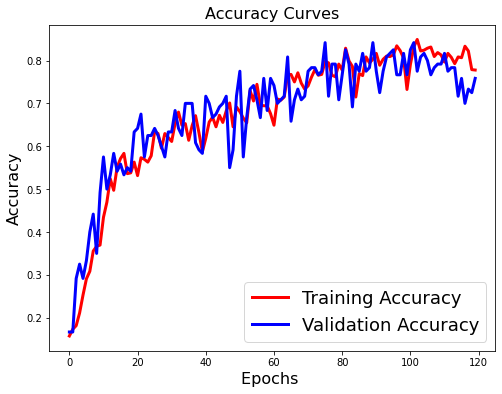

In [131]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train_one_hot, batch_size=128, epochs=120, verbose=1, 
                            validation_data=(X_test, Y_test_one_hot))
 
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [132]:
[test_loss, test_acc] = model.evaluate(X_test, Y_test_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

4/4 [==============================] - 0s 7ms/step - loss: 0.6214 - accuracy: 0.7583
Evaluation result on Test Data : Loss = 0.6214149594306946, accuracy = 0.7583333253860474


# Source 
[Image Classification using Feedforward Neural Network in Keras](https://www.learnopencv.com/image-classification-using-feedforward-neural-network-in-keras/)

